# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('./data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [32]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

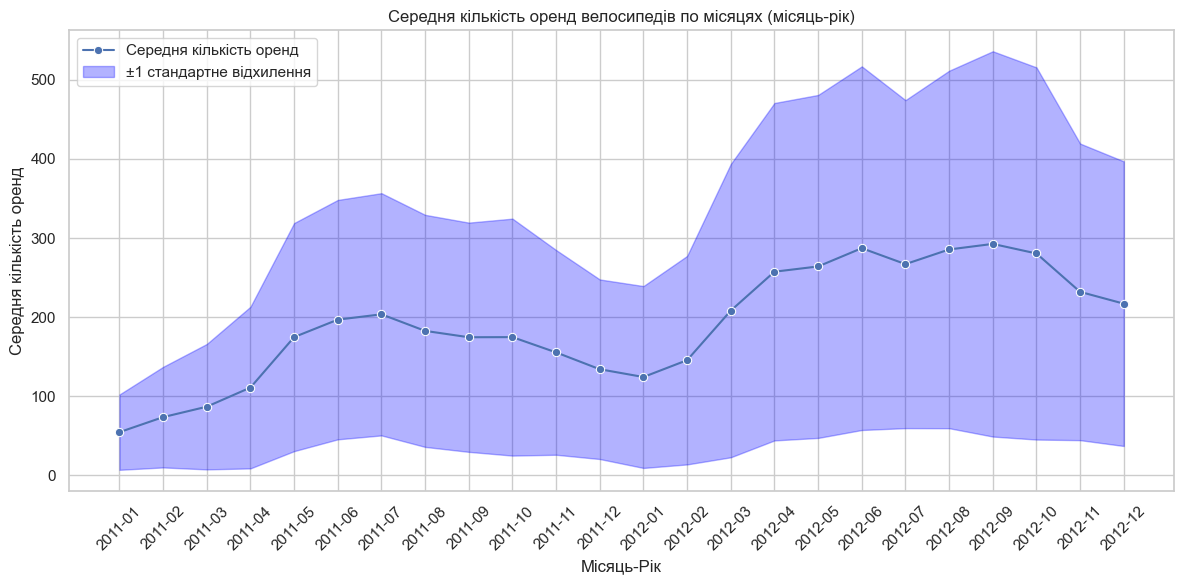

In [33]:
monthly_stats = df.groupby('month_year')['count'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_stats,
    x='month_year',
    y='mean',
    marker='o',
    label='Середня кількість оренд',
)
plt.fill_between(
    monthly_stats['month_year'],
    monthly_stats['mean'] - monthly_stats['std'],
    monthly_stats['mean'] + monthly_stats['std'],
    alpha=0.3,
    color='blue',
    label='±1 стандартне відхилення'
)
plt.xticks(rotation=45)
plt.title('Середня кількість оренд велосипедів по місяцях (місяць-рік)')
plt.xlabel('Місяць-Рік')
plt.ylabel('Середня кількість оренд')
plt.legend()
plt.tight_layout()
plt.show()

**Відповідь на питання для інтерпретації:**
- В червні (06-2012) та вересні (09-2012) 2012 року найбільша невизначеність в даних, оскільки на графіку видно найбільший діапазон даних в ці місяці (найширша смуга).

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

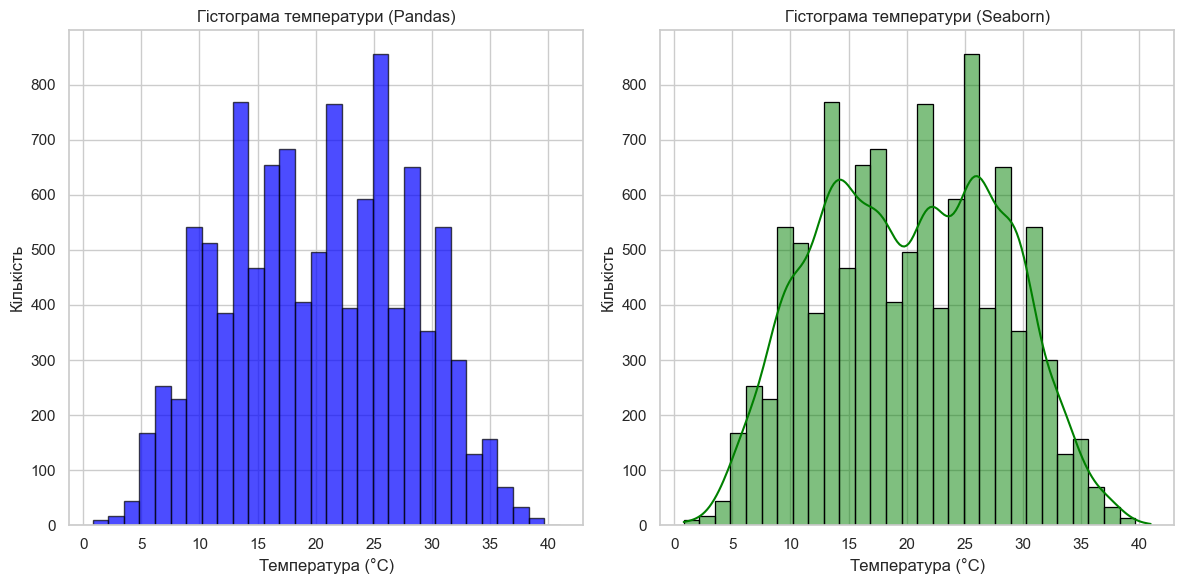

In [34]:
bins = 30
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Гістограма з Pandas
df['temp'].plot.hist(
    bins=bins,
    alpha=0.7,
    color='blue',
    edgecolor='black'
)
plt.title('Гістограма температури (Pandas)')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість')
plt.subplot(1, 2, 2) # Гістограма з Seaborn
sns.histplot(
    data=df,
    x='temp',
    bins=bins,
    kde=True,
    color='green',
    edgecolor='black'
)
plt.title('Гістограма температури (Seaborn)')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість')
plt.tight_layout()
plt.show()

**Відповідь на питання:**
1. Pandas-гістограма візуально проста, без додаткових елементів, в той же час Seaborn-гістограма має більш сучасний вигляд, автоматично застосовує теми, додає додаткову лінію.
2. Додаткова лінія на графіку Seaborn - це KDE-лінія (Kernel Density Estimate), яка показує згладжене уявлення про те, як імовірно розподіляються значення температури, допомагає побачити загальні тенденції, піки, форму розподілу.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

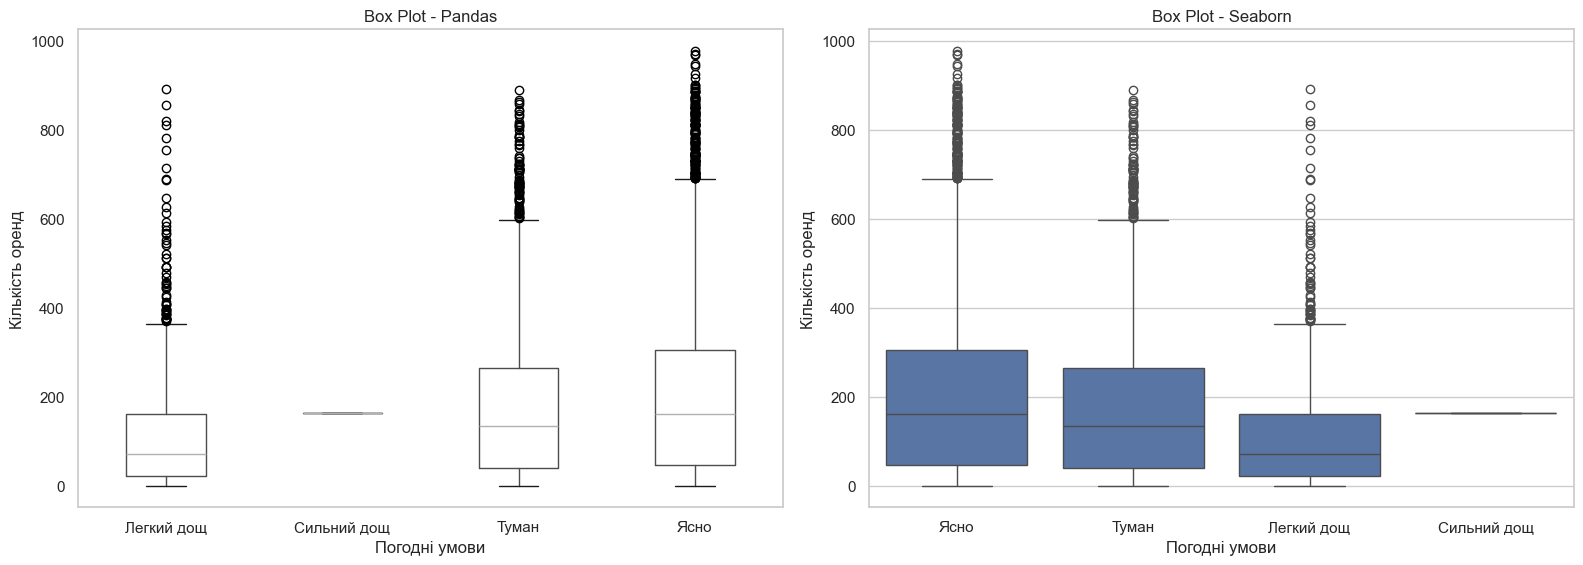

In [35]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_label'] = df['weather'].map(weather_labels)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Boxplot за допомогою Pandas:
df.boxplot(column='count', by='weather_label', ax=axes[0])
axes[0].set_title('Box Plot - Pandas')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')
axes[0].grid(False)
axes[0].get_figure().suptitle('')
# Boxplot за допомогою Seaborn:
sns.boxplot(x='weather_label', y='count', data=df, ax=axes[1])
axes[1].set_title('Box Plot - Seaborn')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

**Відповідь на питання:**
- Бокс-плот Pandas зі стандартними налаштуваннями виглядає сумним та візуально складнішим лдля сприйняття, погодні умови не фільтруються по порядку, в той же час як бокс-плот, побудований за допомогою Seaborn вигладає більш сучасно, має за замовченням зафарбовані бокси та розмірну сітку, що полегшує сприйняття інформації.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


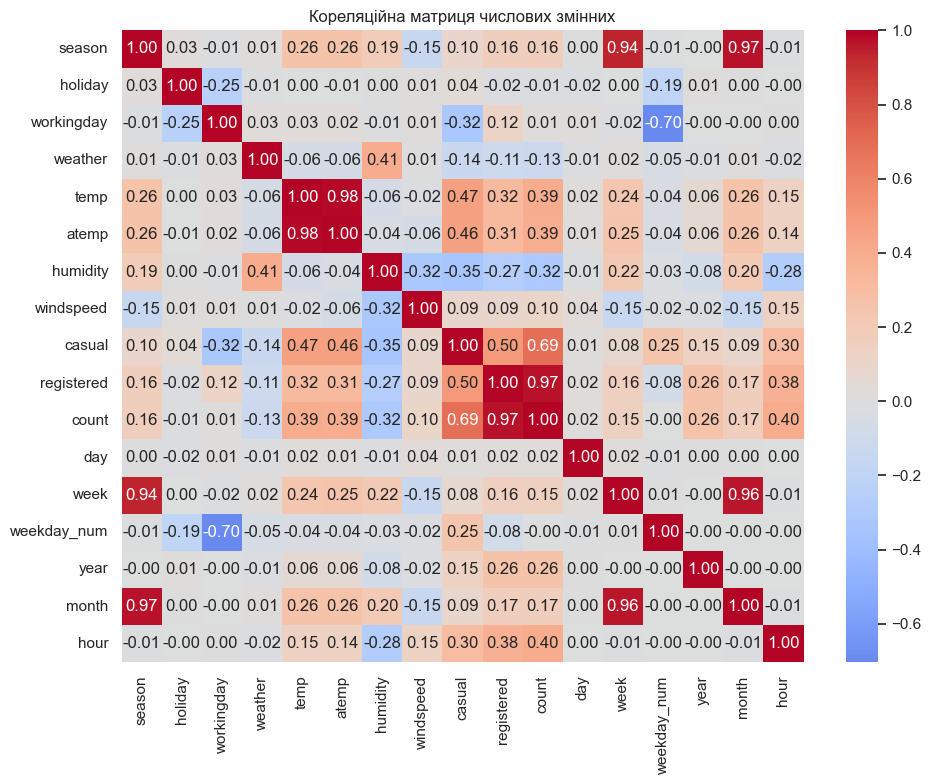

In [36]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()
plt.show()

**Відповіді на питання по графіку:**
1. Найсильніше корелюють з загальною кількістю оренди (count) registered - висока позитивна кореляція (близько 0,97); casual: теж висока позитивна кореляція (0,69); temo/atemp (по 0,39); hour (0,4). Отже, загальна кількість оренд найбільше пов'язана із кількістю зареєстрованих користувачів.
2. Кореляція між temp та atemp дуже висока - 0,97, оскільки atemp — це “температура, яка відчувається”, розрахована на основі фактичної температури, вологості та вітру. Значення atemp і temp тісно пов’язані математично.
3. Негативну кореляцію з count мають humidity (-0,32) та weather (-0,13): при високій вологості та поганій погоді менше оренд.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


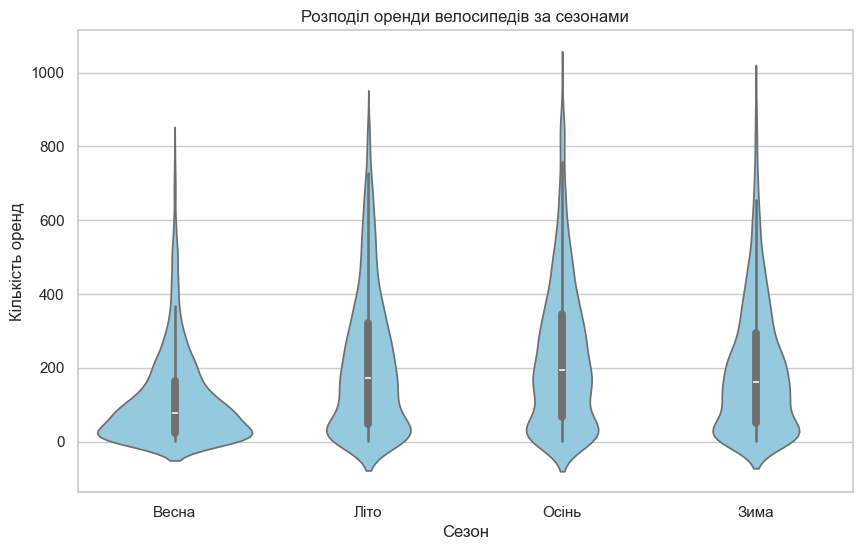

In [37]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_label'] = df['season'].map(season_map)
plt.figure(figsize=(10, 6))
sns.violinplot(x='season_label', y='count', data=df, color='skyblue')
plt.title('Розподіл оренди велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.show()

**Відпоавіді на питання для інтерпретації:**
1. "Товщина" violin plot показує густину розподілу: де товще — там більше значень.
2. Найбільша варіабельність оренди весною (сезон 1): широкий та високий графік.
3. Перевага violin plot в тому, що цей тип графіку показує не тільки медіану й квартилі, а й форму розподілу.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

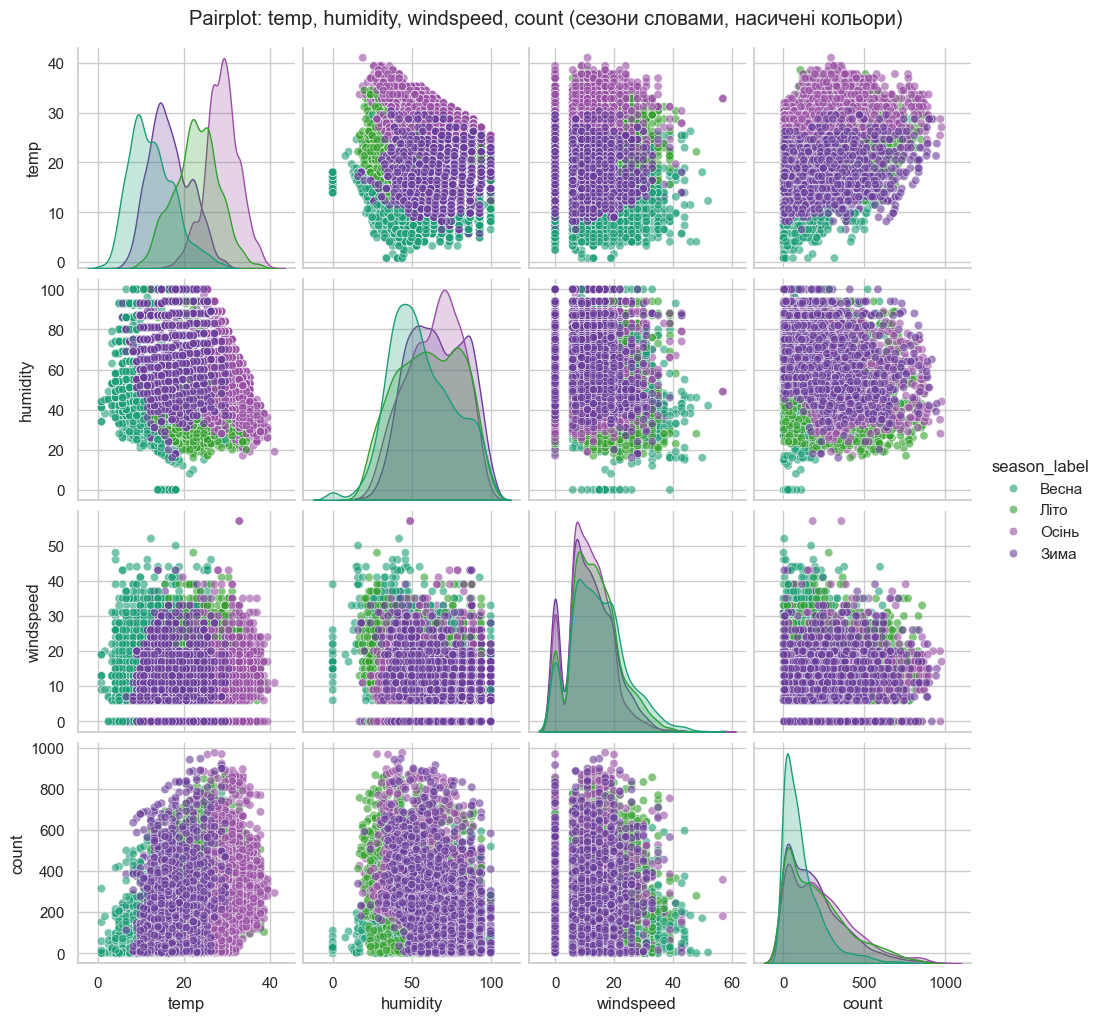

In [38]:
df_plot = df.copy()
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df_plot['season_label'] = df_plot['season'].map(season_map)
strong_palette = {
    'Весна': '#1b9e77',
    'Літо': '#33a02c',
    'Осінь': '#984ea3',
    'Зима': '#6a3d9a'
}
sns.pairplot(
    df_plot[['temp', 'humidity', 'windspeed', 'count', 'season_label']],
    hue='season_label',
    palette=strong_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Pairplot: temp, humidity, windspeed, count (сезони словами, насичені кольори)', y=1.02)
plt.show()

**Відповіді на питання для інтерпретації:**
1. Найсильніший лінійний зв\'язок спостерігається між temp-count: з підвищенням температури кількість оренд зростає, що видно з майже прямолінійної тенденції в scatter-парі temp та count.
2. Найбільше змінюється від сезону температура (temp): графіки на діагоналі (розподіли temp) мають чітке розділення за кольорами (сезонами), що свідчить про сезонну зміну температури.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

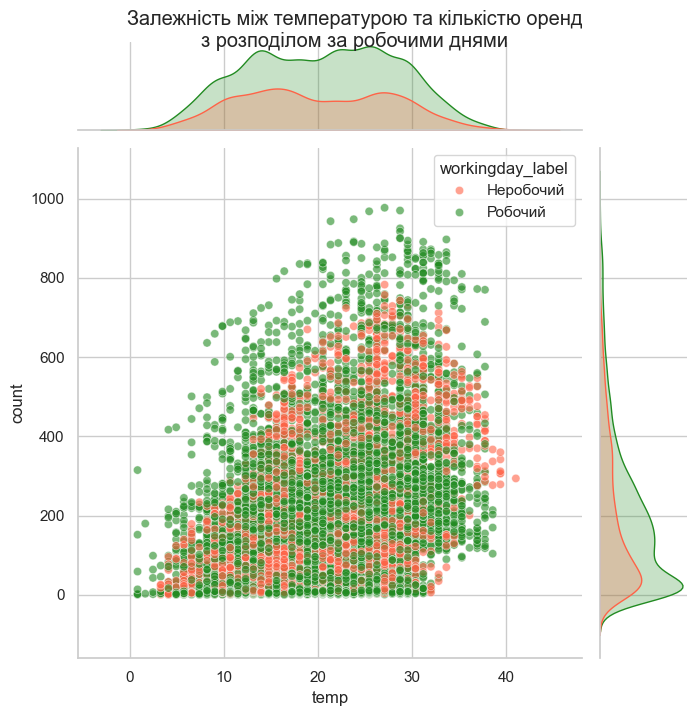

In [39]:
df['workingday_label'] = df['workingday'].map({0: 'Неробочий', 1: 'Робочий'})
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday_label',
    kind='scatter',
    palette={'Робочий': 'forestgreen', 'Неробочий': 'tomato'},
    height=7,
    alpha=0.6
)
plt.suptitle('Залежність між температурою та кількістю оренд\nз розподілом за робочими днями', y=1.02)
plt.show()

**Відповіді питання для інтерпретації:**
1. Графіки по краях показують розподіли температури (зверху) і кількості оренд (справа) допомагають оцінити в яких діапазонах значень спостерігається найбільша активність.
2. Різниця у поведінці користувачів у робочий і неробочий день є: у робочі дні оренд більше, особливо при середніх температурах. У неробочі дні — оренди менш регулярні й менш численні.